In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For consistent plots
plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("data/heart.csv")
df.head()


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,59,52,70,67,73,66,72,61,58,52,...,56,62,56,72,62,74,74,64,67,1
1,72,62,69,67,78,82,74,65,69,63,...,71,63,60,69,73,67,71,56,58,1
2,71,62,70,64,67,64,79,65,70,69,...,70,66,65,64,55,61,41,51,46,1
3,69,71,70,78,61,63,67,65,59,59,...,61,66,65,72,73,68,68,59,63,1
4,70,66,61,66,61,58,69,69,72,68,...,69,70,66,70,64,60,55,49,41,1


In [3]:
df.shape


(267, 45)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       267 non-null    int64
 1   2       267 non-null    int64
 2   3       267 non-null    int64
 3   4       267 non-null    int64
 4   5       267 non-null    int64
 5   6       267 non-null    int64
 6   7       267 non-null    int64
 7   8       267 non-null    int64
 8   9       267 non-null    int64
 9   10      267 non-null    int64
 10  11      267 non-null    int64
 11  12      267 non-null    int64
 12  13      267 non-null    int64
 13  14      267 non-null    int64
 14  15      267 non-null    int64
 15  16      267 non-null    int64
 16  17      267 non-null    int64
 17  18      267 non-null    int64
 18  19      267 non-null    int64
 19  20      267 non-null    int64
 20  21      267 non-null    int64
 21  22      267 non-null    int64
 22  23      267 non-null    int64
 23  24      267 non

In [5]:
df.isnull().sum()


1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
dtype: int64

In [6]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,66.183521,64.913858,68.677903,69.078652,64.801498,63.966292,70.168539,69.389513,63.295880,62.232210,...,62.584270,65.247191,64.198502,65.902622,64.052434,62.438202,60.411985,52.580524,50.535581,0.794007
std,8.250315,9.444937,6.593543,8.394267,8.826328,9.479835,8.355678,9.497030,9.020783,9.340188,...,10.948075,7.885383,9.251393,12.086696,12.693505,14.436760,15.200500,12.809920,14.548133,0.405185
min,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,22.000000,...,13.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,11.000000,4.000000,0.000000
25%,62.000000,60.000000,65.000000,66.000000,61.000000,60.000000,68.000000,67.000000,61.000000,58.000000,...,61.000000,62.000000,60.000000,62.500000,60.000000,59.500000,56.000000,49.000000,45.000000,1.000000
50%,67.000000,66.000000,69.000000,71.000000,66.000000,66.000000,72.000000,72.000000,65.000000,64.000000,...,65.000000,66.000000,66.000000,69.000000,67.000000,67.000000,65.000000,56.000000,55.000000,1.000000
75%,71.500000,71.000000,73.000000,74.000000,70.000000,70.000000,75.000000,75.000000,68.000000,68.000000,...,69.000000,71.000000,71.000000,73.000000,72.000000,72.000000,70.000000,61.000000,60.000000,1.000000
max,83.000000,81.000000,82.000000,84.000000,82.000000,89.000000,85.000000,83.000000,77.000000,78.000000,...,77.000000,80.000000,79.000000,83.000000,81.000000,82.000000,83.000000,82.000000,73.000000,1.000000


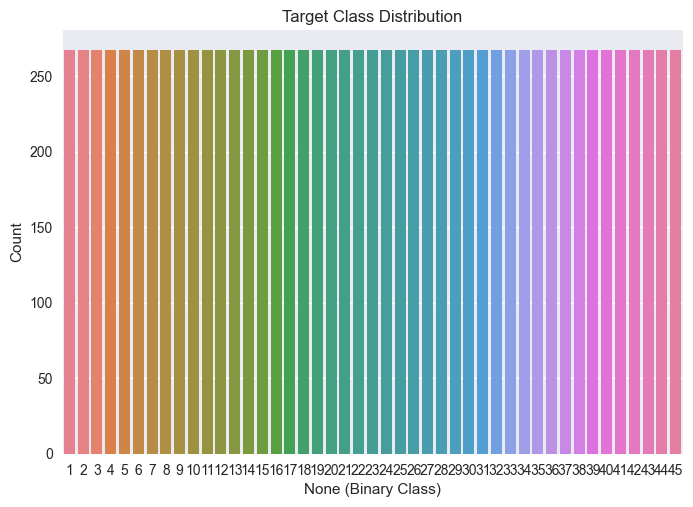

In [12]:
sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.xlabel(f"{target_col} (Binary Class)")
plt.ylabel("Count")
plt.show()


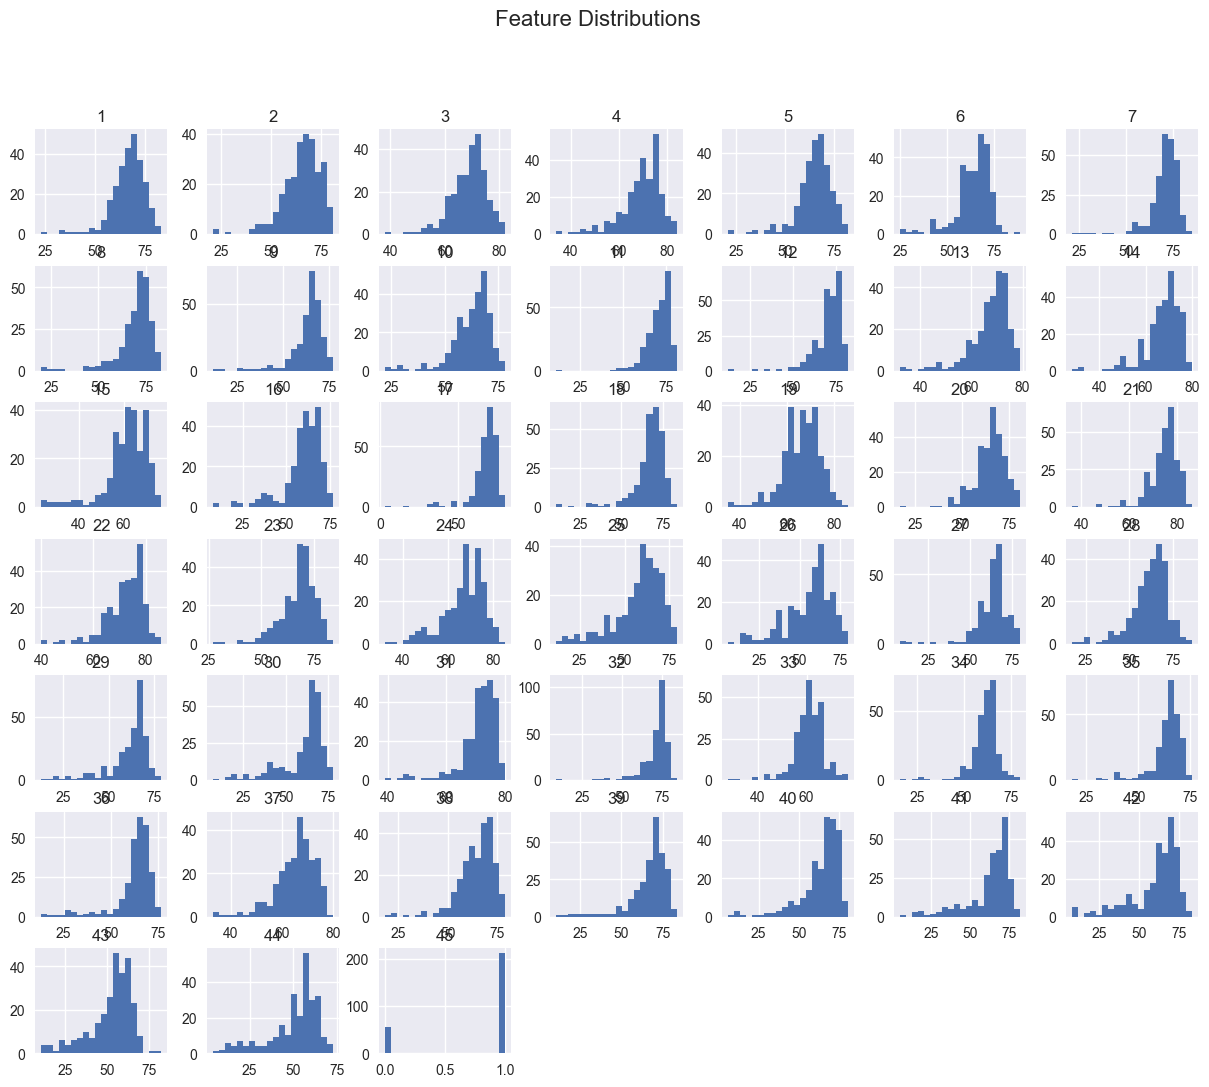

In [13]:
df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

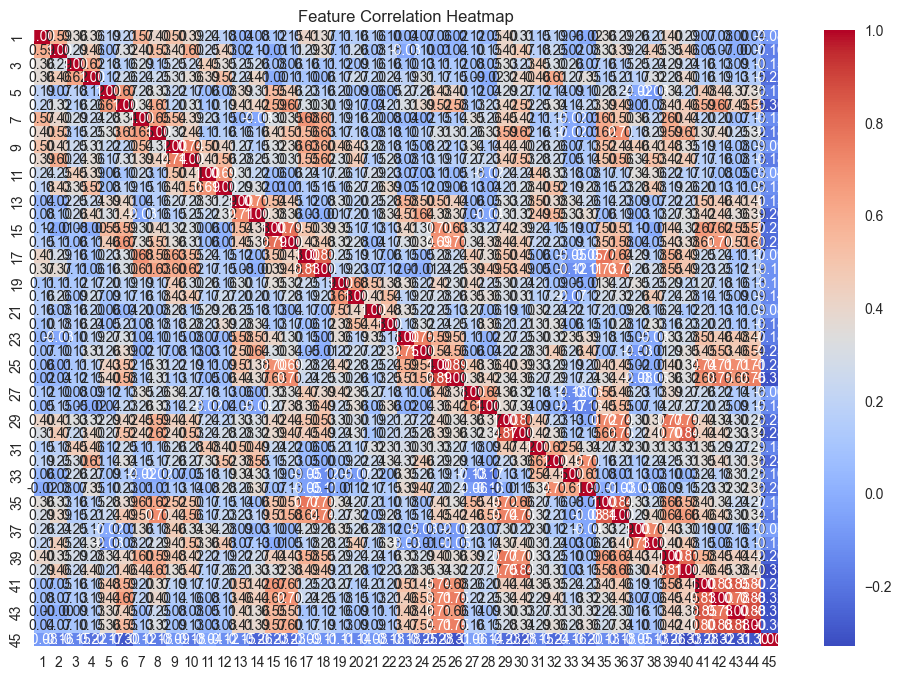

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

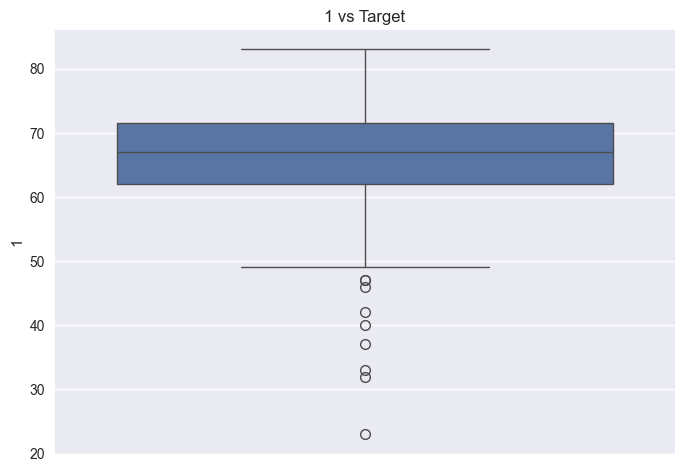

In [18]:
num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if target_col in num_features:
    num_features.remove(target_col)
feature_to_plot = num_features[0]

sns.boxplot(x=target_col, y=feature_to_plot, data=df)
plt.title(f"{feature_to_plot} vs Target")
plt.show()

## Exploratory Data Analysis (EDA) Insights

- The dataset contains a mix of numerical and categorical features, making it suitable for a binary classification task using a neural network.
- The target variable shows a reasonably balanced class distribution, which helps in stable model training.
- Feature distribution plots indicate that numerical features have different ranges and scales, highlighting the need for feature scaling before model training.
- The correlation heatmap reveals that some features have moderate correlation with the target variable, suggesting they may contribute significantly to prediction.
- No extreme multicollinearity is observed among features, which is beneficial for model generalization.


In [26]:
# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (267, 44)
Target shape: (267,)


In [27]:
from sklearn.model_selection import train_test_split

# First split: 60% train, 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# Second split: 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (160, 44)
Validation set shape: (53, 44)
Test set shape: (54, 44)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled validation shape:", X_val_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled training shape: (160, 44)
Scaled validation shape: (53, 44)
Scaled test shape: (54, 44)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,505 (21.50 KB)

 Trainable params: 5,505 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Create model directory if it doesn't exist
os.makedirs("model", exist_ok=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath="model/best_model.h5",
    monitor='val_loss',
    save_best_only=True
)


In [36]:
early_stopping, model_checkpoint

(<keras.src.callbacks.early_stopping.EarlyStopping at 0x1ef1b0bac50>,
 <keras.src.callbacks.model_checkpoint.ModelCheckpoint at 0x1ef1a6a3fa0>)

In [37]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4375 - loss: 0.6750

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6625 - loss: 0.6206 - val_accuracy: 0.7736 - val_loss: 0.5774
Epoch 2/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 0.4994

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7937 - loss: 0.4973 - val_accuracy: 0.7925 - val_loss: 0.5228
Epoch 3/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6875 - loss: 0.5223

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7937 - loss: 0.4325 - val_accuracy: 0.7925 - val_loss: 0.4876
Epoch 4/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8750 - loss: 0.3642

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7937 - loss: 0.3919 - val_accuracy: 0.7925 - val_loss: 0.4665
Epoch 5/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.4108

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7937 - loss: 0.3619 - val_accuracy: 0.7925 - val_loss: 0.4559
Epoch 6/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6875 - loss: 0.3754

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7937 - loss: 0.3374 - val_accuracy: 0.7925 - val_loss: 0.4498
Epoch 7/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.3934

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7937 - loss: 0.3154 - val_accuracy: 0.7736 - val_loss: 0.4474
Epoch 8/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 0.2682

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8375 - loss: 0.2962 - val_accuracy: 0.7358 - val_loss: 0.4458
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8625 - loss: 0.2746 - val_accuracy: 0.7547 - val_loss: 0.4466
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8938 - loss: 0.2553 - val_accuracy: 0.7736 - val_loss: 0.4516
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9125 - loss: 0.2382 - val_accuracy: 0.7547 - val_loss: 0.4593
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9250 - loss: 0.2223 - val_accuracy: 0.7547 - val_loss: 0.4707
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9438 - loss: 0.2039 - val_accuracy: 0.7358 - val_loss: 0.4846
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9375 - loss: 0.1904 - val_accuracy: 0.7358 - val_loss: 0.4961
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9500 - loss: 0.1735 - val_accuracy: 0.7170 -

In [38]:
import os

os.path.exists("model/best_model.h5")

True

In [39]:
from tensorflow.keras.models import load_model

best_model = load_model("model/best_model.h5")